In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
import matplotlib as plt
import datetime as dati
sns.set()

In [2]:
df =pd.read_csv("data/clicks.csv.gzip", compression='gzip')
df.dtypes

advertiser_id        int64
action_id          float64
source_id            int64
created             object
country_code         int64
latitude           float64
longitude          float64
wifi_connection       bool
carrier_id         float64
trans_id            object
os_minor           float64
agent_device       float64
os_major           float64
specs_brand          int64
brand              float64
timeToClick        float64
touchX             float64
touchY             float64
ref_type             int64
ref_hash             int64
dtype: object

In [3]:
df['wifi_connection'].value_counts()

False    26351
Name: wifi_connection, dtype: int64

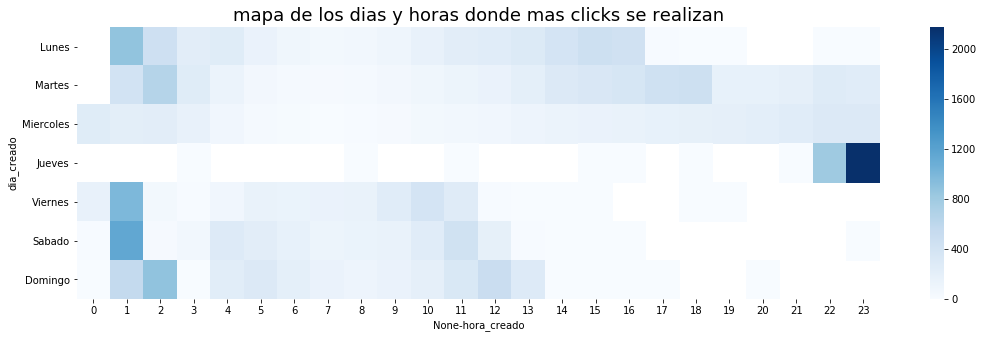

In [4]:

df['created'] = pd.to_datetime(df['created'])

df['hora_creado']=df['created'].dt.hour
df['dia_creado']=df['created'].dt.weekday
df['ocurrencias']=1
tabla=df[['dia_creado', 'hora_creado','ocurrencias']].groupby(['dia_creado','hora_creado']).count()
matriz = tabla.unstack()

#plt.pcolor(m,yticklabels=True,xticklabels=True, cmap='Reds')
fig, ax =plt.subplots(figsize=(18,5))
title="mapa de los dias y horas donde mas clicks se realizan"
plt.title(title,fontsize=18)
tit=ax.title
ax.set_xticks([])
ax.set_yticks([])
etiquetaX=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
etiquetaY=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
sns.heatmap(matriz,yticklabels=etiquetaY,xticklabels=etiquetaX,fmt="", cmap='Blues',ax=ax);


3    26263
0       70
2       12
7        2
1        2
8        1
5        1
Name: advertiser_id, dtype: int64

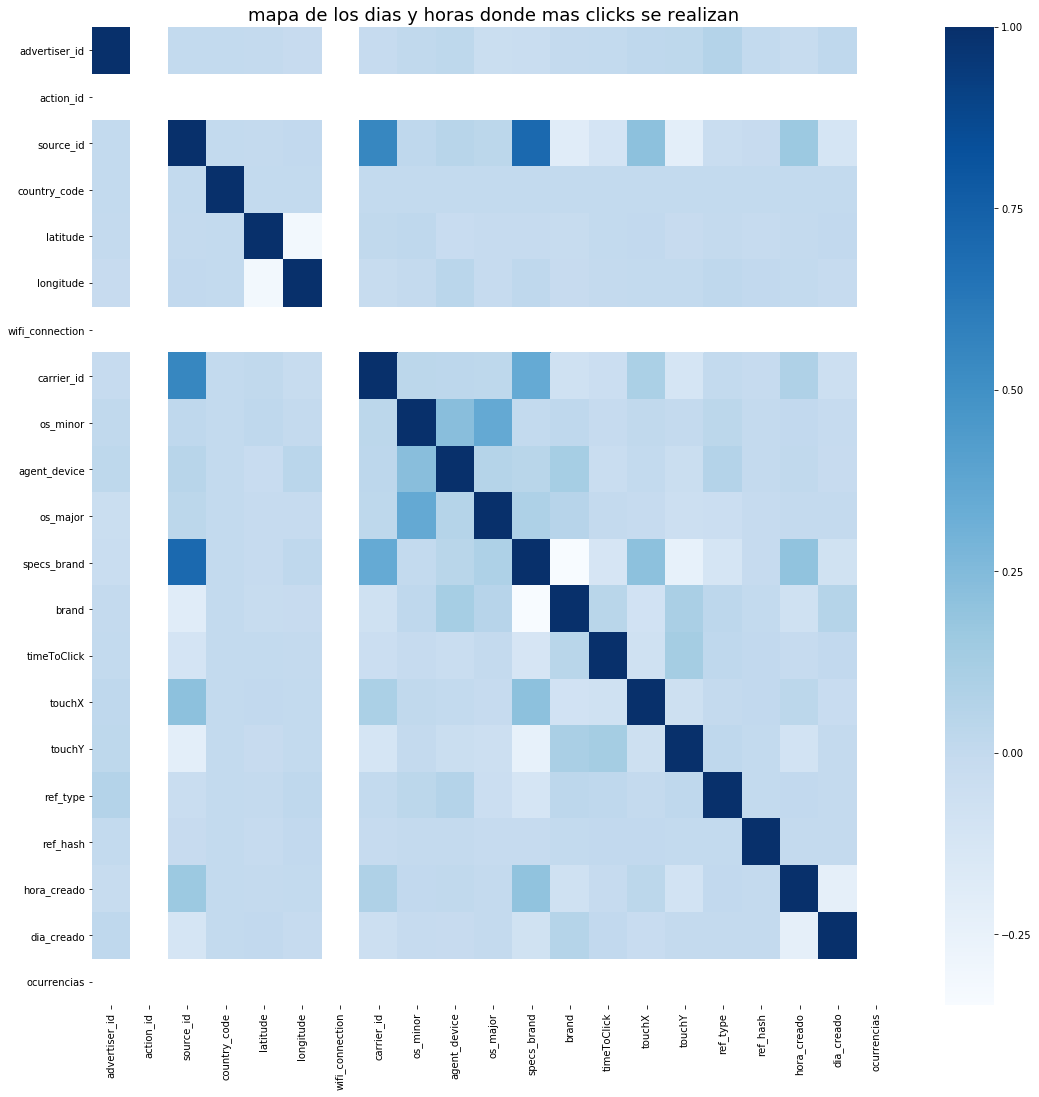

In [5]:
corr=df.corr()

fig, ax =plt.subplots(figsize=(18,18))
title="mapa de los dias y horas donde mas clicks se realizan"
plt.title(title,fontsize=18)
tit=ax.title
ax.set_xticks([])
ax.set_yticks([])


sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap='Blues',ax=ax );
df['advertiser_id'].value_counts()

AttributeError: 'AxesSubplot' object has no attribute 'set_labels'

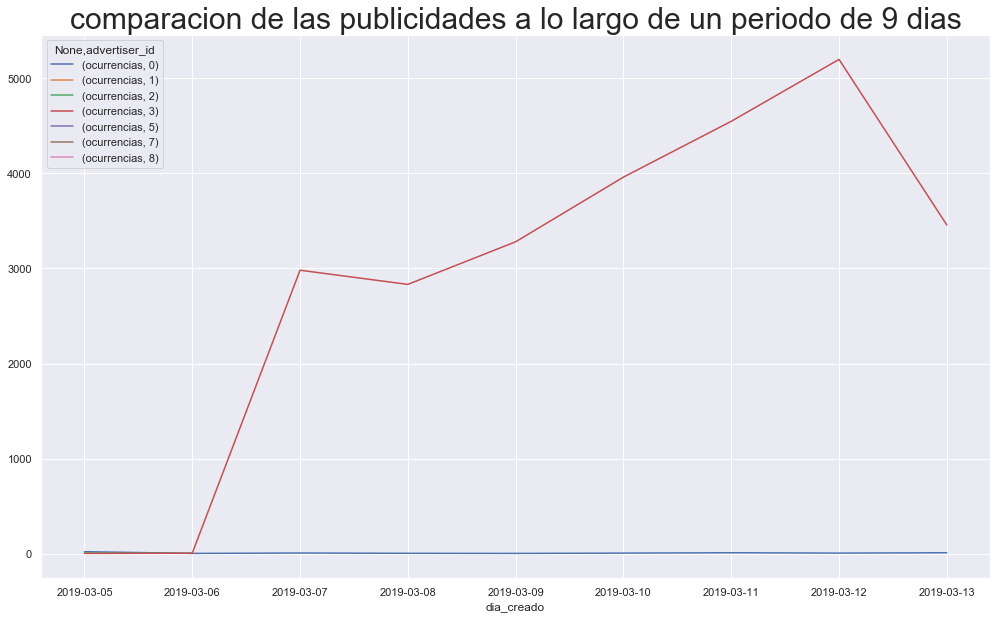

In [45]:

df['dia_creado']=df['created'].dt.date
tabla=df[['dia_creado','ocurrencias','advertiser_id']].groupby(['dia_creado','advertiser_id']).count()
tabla = tabla.unstack()

grafico=tabla.plot(figsize=(17, 10),ms=10.0)
# create valid markers from mpl.markers
valid_markers = ([item[0] for item in plt.markers.MarkerStyle.markers.items() if item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])
 
# valid_markers = mpl.markers.MarkerStyle.filled_markers
grafico.set_title("comparacion de las publicidades a lo largo de un periodo de 9 dias",fontsize= 30)
markers = np.random.choice(valid_markers, df.shape[1], replace=False)
#grafico.set_labels((line1, line2, line3,line4,line5,line6,line7,line8), ('publicidad 1', 'publicidad 2', 'publicidad 3','publicidad 4','publicidad 5','publicidad 6','publicidad 7','publicidad 8'))
for i, line in enumerate(grafico.get_lines()):
    line.set_marker(markers[i])



